In [1]:
import os
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
os.chdir(path)
path

'C:\\Users\\user\\Desktop\\Anuranan\\KFSC-Python'

In [2]:
!pip install soyclustering

In [3]:
import time
from multiprocessing import Pool
import multiprocessing
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score
from BestMap import BestMap
from KFSC import KFSC
from KFSC_LARGE import KFSC_LARGE
from KFSC_minibatch import KFSC_MB
from multi_tester import test_dataset

In [4]:
# dataset = 'mnist_sc_f150.mat'
# dataset = 'fmnist_fea_150.mat'
# dataset = 'covtype.mat'
# dataset = 'PokerHand2.mat'
# dataset = 'Postures_m.mat'
dataset = 'Epileptic.mat'
f = sio.loadmat(dataset)
X = f['X']
label = np.concatenate(f['Label'])
k = len(np.unique(label))
cpu_count = multiprocessing.cpu_count()
use_cpu = 23
print("CPU count: ", cpu_count)
print("Using CPU: ", use_cpu)

CPU count:  48
Using CPU:  23


In [5]:
iterations = 46
funct_to_run = KFSC_MB
params = {}
params["opt"] = {
    'solver': 2,
    'maxiter': 300,
    'tol': 1e-4,
    'init_type': 'k-means-cos',
    'nrep_kmeans': 1,
    'classifier': 're'
}
params["opt"]['batch_size'] = 5*np.logspace(1, 3, iterations, dtype=int)

In [6]:
params["opt"]['batch_size']

array([  50,   55,   60,   65,   75,   80,   90,  100,  110,  125,  135,
        150,  170,  185,  205,  230,  255,  280,  315,  345,  385,  425,
        475,  525,  580,  645,  715,  790,  875,  970, 1075, 1190, 1320,
       1460, 1620, 1795, 1990, 2205, 2440, 2705, 2995, 3320, 3675, 4070,
       4510, 5000])

In [7]:
[] + [X, k, label, funct_to_run, dataset]

[array([[ 135,  386,  -32, ...,   14,  -40,   29],
        [ 190,  382,  -39, ...,    6,  -25,   41],
        [ 229,  356,  -47, ...,  -13,   -9,   57],
        ...,
        [-116,  154,  -35, ...,   -2,   68,   -2],
        [ -83,  143,  -35, ...,   -1,   59,    2],
        [ -51,  129,  -36, ...,   -8,   55,   20]], dtype=int16),
 5,
 array([4, 1, 5, ..., 5, 3, 4], dtype=uint8),
 <function KFSC_minibatch.KFSC_MB(X, k, d, lamda, options: Optional[dict] = None)>,
 'Epileptic.mat']

In [8]:
arg_list = []
for i in range(iterations):
    arg_list.append([])
    arg_list[-1] += [X, k, label, funct_to_run, dataset]
    print(arg_list[-1])
    build_dict = {}
#     for key in params.keys():
#         build_dict[key] = params[key][i]
    build_dict['opt'] = {}
    for key in params['opt'].keys():
        if key == 'batch_size':         
            build_dict['opt'][key] = params['opt'][key][i]
        else:
            build_dict['opt'][key] = params['opt'][key]
            
    arg_list[-1].append(build_dict)
    arg_list[-1] = tuple(arg_list[-1])
arg_list[28]

[array([[ 135,  386,  -32, ...,   14,  -40,   29],
       [ 190,  382,  -39, ...,    6,  -25,   41],
       [ 229,  356,  -47, ...,  -13,   -9,   57],
       ...,
       [-116,  154,  -35, ...,   -2,   68,   -2],
       [ -83,  143,  -35, ...,   -1,   59,    2],
       [ -51,  129,  -36, ...,   -8,   55,   20]], dtype=int16), 5, array([4, 1, 5, ..., 5, 3, 4], dtype=uint8), <function KFSC_MB at 0x000001B579F761F0>, 'Epileptic.mat']
[array([[ 135,  386,  -32, ...,   14,  -40,   29],
       [ 190,  382,  -39, ...,    6,  -25,   41],
       [ 229,  356,  -47, ...,  -13,   -9,   57],
       ...,
       [-116,  154,  -35, ...,   -2,   68,   -2],
       [ -83,  143,  -35, ...,   -1,   59,    2],
       [ -51,  129,  -36, ...,   -8,   55,   20]], dtype=int16), 5, array([4, 1, 5, ..., 5, 3, 4], dtype=uint8), <function KFSC_MB at 0x000001B579F761F0>, 'Epileptic.mat']
[array([[ 135,  386,  -32, ...,   14,  -40,   29],
       [ 190,  382,  -39, ...,    6,  -25,   41],
       [ 229,  356,  -47, ...

(array([[ 135,  386,  -32, ...,   14,  -40,   29],
        [ 190,  382,  -39, ...,    6,  -25,   41],
        [ 229,  356,  -47, ...,  -13,   -9,   57],
        ...,
        [-116,  154,  -35, ...,   -2,   68,   -2],
        [ -83,  143,  -35, ...,   -1,   59,    2],
        [ -51,  129,  -36, ...,   -8,   55,   20]], dtype=int16),
 5,
 array([4, 1, 5, ..., 5, 3, 4], dtype=uint8),
 <function KFSC_minibatch.KFSC_MB(X, k, d, lamda, options: Optional[dict] = None)>,
 'Epileptic.mat',
 {'opt': {'solver': 2,
   'maxiter': 300,
   'tol': 0.0001,
   'init_type': 'k-means-cos',
   'nrep_kmeans': 1,
   'classifier': 're',
   'batch_size': 875}})

In [9]:
with Pool(processes=use_cpu) as p:
    df_list = p.starmap(test_dataset, arg_list)
combined_df = pd.concat(df_list, ignore_index=True)
path = os.getcwd()
os.chdir(path+'//Scores')
combined_df.to_csv(dataset.split('_')[0] + 'batch_vary_run_info.csv', mode='a', index=False, header=False)

In [10]:
combined_df

,Dataset,acc,nmi,time,d,lamda,opt,Function,parameters
0,Epileptic.mat,0.236522,0.030889,178.580125,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
1,Epileptic.mat,0.269739,0.064440,178.136083,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
2,Epileptic.mat,0.237565,0.033395,178.077340,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
3,Epileptic.mat,0.271565,0.057584,177.379416,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
4,Epileptic.mat,0.246609,0.016384,176.519208,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
5,Epileptic.mat,0.268870,0.026848,175.948722,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
6,Epileptic.mat,0.240696,0.013645,174.820693,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
7,Epileptic.mat,0.237304,0.025730,172.956907,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
8,Epileptic.mat,0.292087,0.048960,156.884197,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
9,Epileptic.mat,0.240870,0.013978,130.893733,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."


In [11]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.titlesize':'xx-large'}
pylab.rcParams.update(params)

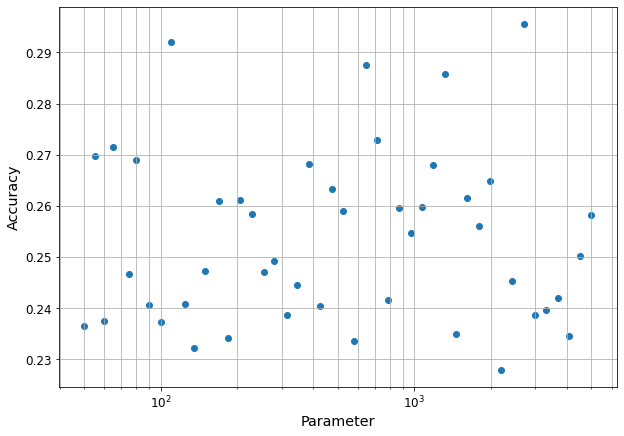

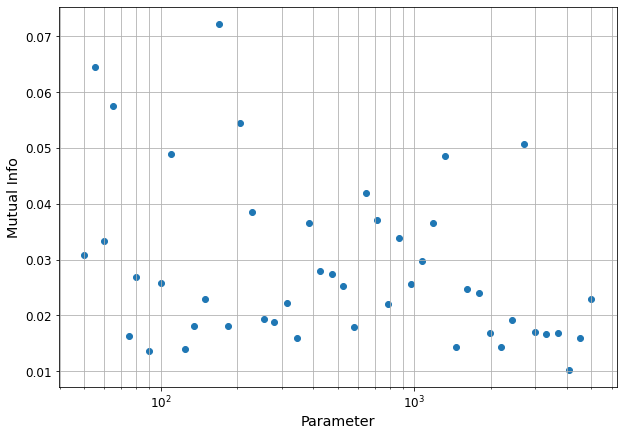

In [12]:
# xvals = [combined_df['parameters'][i]['nsel'] for 
#          i in range(len(list(combined_df['parameters'])))]
xvals = [combined_df['parameters'][i]['opt']['batch_size'] for 
         i in range(len(list(combined_df['parameters'])))]
plt.scatter(xvals, combined_df['acc'])
plt.ylabel("Accuracy"); plt.xlabel("Parameter")
plt.xscale('log')
plt.grid(which='both')
plt.show()

plt.scatter(xvals, combined_df['nmi'])
plt.ylabel("Mutual Info"); plt.xlabel("Parameter")
plt.xscale('log')
plt.grid(which='both')
plt.show()

